In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from scipy.stats import norm,rayleigh

import pylab
import datetime

from tkinter import *
from tkinter import filedialog

from numpy import array, polyfit, poly1d
from pandas import DataFrame, to_datetime

In [2]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data", title = "Select PRIM master file",\
                        filetypes = (("Prim files","*.prim"),("Seco files","*.seco"),("all files","*.*")))
    root.destroy()

    return(root.filename)

In [3]:
def Do_Scatter_Plot(x_val1, y_val1, x_val2,y_val2):
    
    plt.figure(figsize=(20,8))
    
    plt.subplot(1,2,1)
    max_val = max(max(x_val1),max(y_val1))*1.05
    plt.xlim(0,max_val)
    plt.ylim(0,max_val)
    plt.scatter(x_val1, y_val1,c='xkcd:aquamarine',s=.25)
    plt.grid()
    plt.xlabel('Hsig',fontsize=14)
    plt.ylabel('Hm0',fontsize=14)

# calc the trendline
    z = np.polyfit(x_val1,y_val1, 1)
    p = np.poly1d(z)
    pylab.plot(x_val1,p(x_val1),color='grey',dashes=[5, 5, 5, 5])
    
    plt.text(0.5,5.5,"Hm0 = %.6f*Hsig + %.6f"%(z[0],z[1]))
    plt.subplot(1,2,2)
    max_val = max(max(x_val2),max(y_val2))*1.05
    plt.xlim(0,max_val)
    plt.ylim(0,max_val)
    plt.scatter(x_val2, y_val2,c='xkcd:wheat',s=.25)
    plt.grid()
    plt.xlabel('Tz',fontsize=14)
    plt.ylabel('T02',fontsize=14)

# calc the trendline
    z = np.polyfit(x_val2,y_val2, 1)
    p = np.poly1d(z)
    pylab.plot(x_val2,p(x_val2),color='grey',dashes=[5, 5, 5, 5]) 
    plt.text(0.5,5.5,"T02 = %.6f*Tz + %.6f"%(z[0],z[1]))
    
    plt.show()
    
    return()    # Do_Scatter_Plot()

In [4]:
def Do_Bivariate(x_val,y_val):
    plt.figure(figsize=(15,8))
    my_cmap = plt.cm.Greys
    my_cmap.set_under('w',0)
    counts,xbins,ybins,image = plt.hist2d(x_val,y_val,bins=500,normed=True, cmap = my_cmap)
    plt.colorbar()

    plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=0.5,cmap=my_cmap)
    plt.xlabel('Tz (s)',fontsize=16)
    plt.ylabel('Hsig (m)',fontsize=16)
    plt.grid(True)
    plt.axis('On')
    plt.show()
    
    return()    # Do_Bivariate()

In [5]:
def Do_Histogram(x_val):
    x = np.array(x_val)
    binwidth = 0.2

    plt.figure(figsize=(10,10))
# the histogram of the data
    n, bins, patches = plt.hist(x, bins=np.arange(round(min(x)),round(max(x)) + binwidth,binwidth),\
                        density=1,edgecolor='black',facecolor='lightgray',alpha=0.2)
 
# add a 'best fit' line
    mu = np.mean(x) # mean of distribution
    sigma = np.std(x) # standard deviation of distribution

    y = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, y, 'r-.')
    plt.xlabel('Hsig')
    plt.ylabel('Probability')
    plt.title('Histogram of Wave Heights')
 
    plt.show()
    return()    # Do_Histogram() 

In [6]:
def Do_time_series_plot(Date,Hsig,Hmax,Tz,Tp):
# Do time series plot
    
    plt.figure(figsize=(20, 10))

    bottom = min(min(Hsig),min(Hmax))*0.95
    top = max(max(Hsig),max(Hmax))*1.05
    
    plt.subplot(2,1,1)
    plt.title('Hsig & Hmax',fontsize=12)
#    plt.xlim(left=0,right=1800)
    plt.ylim(bottom=bottom,top=top)
    plt.grid(True)
    plt.plot(Date,Hmax,c='xkcd:azure',label='Hmax',linewidth=0.75)
    plt.plot(Date,Hsig,c='xkcd:wheat',label='Hsig',linewidth=0.75)

    plt.legend(loc='upper right',fontsize=12,frameon=False)
    
    plt.subplot(2,1,2)
    plt.title('Tz & Tp',fontsize=12)
    bottom = min(min(Tp),min(Tz))*0.95
    top = max(max(Tp),max(Tz))*1.05
    plt.ylim(bottom=bottom,top=top)
    plt.grid(True)
    plt.plot(Date,Tp,c='xkcd:aquamarine',label='Tp',linewidth=0.75)
    plt.plot(Date,Hsig,c='xkcd:wheat',label='Tz',linewidth=0.75)
    plt.legend(loc='upper right',fontsize=12,frameon=False)
#    plt.tight_layout()
    
    plt.show()
    
    return

In [7]:
def Do_Rayleigh(waves,Hsig,Hrms,Hmax):
    import collections
    plt.figure(figsize=(15,10))
    mean, var, skew, kurt = rayleigh.stats(moments='mvsk')
    x = np.linspace(rayleigh.ppf(0.01),rayleigh.ppf(0.99),100)

# Plot histogram of wave heights
    i=0;nbins = []
    while i<Hmax+0.2:
        nbins.append(i)
        i += 0.2
    i+= 0.2 
    inds = np.digitize(waves,nbins)
    c = collections.Counter(inds)
    a = sorted(c.items())
    bin_count = []
    i = 0; j = 0
    while i <=len(nbins)-2:
        if a[:][j][0]-1 == i:
            bin_count.append(a[:][j][1])
            j += 1
        else:
            bin_count.append(0)
        i+=1
    
    plt.xaxis = (0,max(nbins))
    plt.hist(waves,bins=nbins,density='normed',range=(0,max(waves)),edgecolor='black',\
             facecolor='xkcd:aquamarine',alpha=0.5)
    for i in range(len(nbins)-1):
        plt.text(nbins[i]+0.075,0.05,bin_count[i],fontsize=14)
        
# Plot Rayleigh distribution
##    plt.plot(x, rayleigh.pdf(x,0,1),'r-', lw=4, alpha=0.6,label='Rayleigh')
  
# Do a Rayleigh distribution based on Hrms  
    x1 = np.linspace(0,Hmax,100)
    p_h = []
    for i in x1:
        p_h.append(2*i/Hrms**2*np.exp(-i**2/Hrms**2))

    plt.text(nbins[len(nbins)-4], max(p_h)*0.8, 'Hmax = '+"%.2f" % Hmax+'m',\
             horizontalalignment='left',verticalalignment='center',fontsize=15)
    plt.text(nbins[len(nbins)-4], max(p_h)*0.75, 'No. of waves = '+"%.2d" % len(waves),\
             horizontalalignment='left',verticalalignment='center',fontsize=15)

    plt.plot(x1,p_h, lw=4,label='Rayleigh (Hrms)')

# Plot Normal distribution
    y_pdf=sp.stats.norm.pdf(x,np.mean(waves),np.std(waves))
    plt.plot(x,y_pdf, lw=4,label='Normal distribution')
    
    plt.xlabel('Wave height (m)')
    plt.ylabel('Probability')
    plt.legend(frameon=False)
#    plt.title(Record_time,fontsize=10)
    plt.show()

    return()    # Do_Rayleigh() 

C:\Users\Jim\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


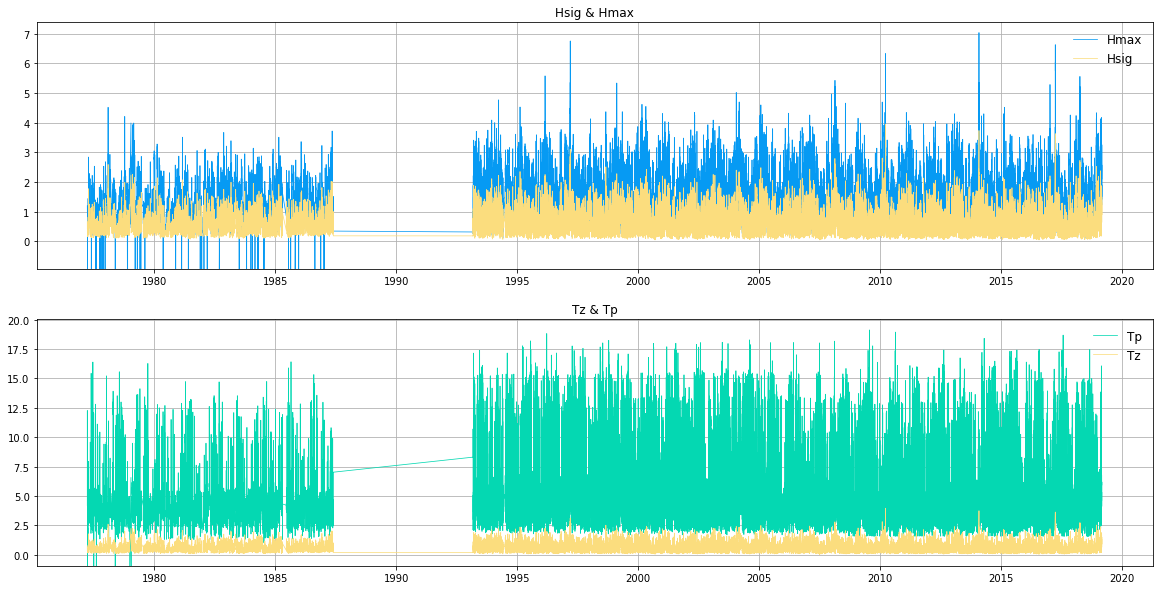

Finished


In [8]:
############################################
#    MAIN PROGRAM
############################################

# Create a DT based on the structure type of the PRIM Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro
pp1 = np.dtype([
    ('P1', 'B'),('P2', 'B'),('P3', 'B'),('P4', 'B'),('P5', 'B'),('P6', 'B'),('P7', 'B'),('P8', 'B'),
    ('P9', 'B'),('P10', 'B'),('P11', 'B'),('P12', 'B')])
pp2 = np.dtype([('p1', 'f'),('p2', 'f'),('p3', 'f'),('p4', 'f')])

rectype = np.dtype([
    ('Procid',pp1),
    ('Loc','i'),
    ('Year','i'),('Month','i'),('Day', 'i'),('Hour', 'i'),('Min', 'i'), ('Sec','i'), 
    ('Hsig','f'), ('Thsig','f'), ('Hrms', 'f'), ('Hmax', 'f'),('Tc', 'f'),('Tz', 'f'), ('H10', 'f'), 
    ('Th10', 'f'), ('Thmax', 'f'), ('Tzmax', 'f'), ('Hm0', 'f'),('T02', 'f'),('Tp', 'f'), ('EPS', 'f'), 
    ('Npts', 'i'),
    ('Param2',pp2)])

# Get name of input PRIM file
Input_Prim_File = get_file()

# Open file
f = open(Input_Prim_File)

# Read data from the Binary file into a DF based on the structure in the DT
recs = DataFrame(np.fromfile(f, rectype))

# Convert date/time column data into Dates and times
Record_time = pd.DataFrame({'Year': recs.Year,'month': recs.Month,'day': recs.Day,'hour': recs.Hour,\
                            'minute': recs.Min,'second': recs.Sec})

# Found an issue in the Townsville Master File - some year data for 1998 entered as 98
#    - this caused problems with date conversion!
Record_time['Year'] = np.where(Record_time.Year < 1900, 1998, Record_time.Year) # <---- Needed this for Townsville

# Insert Date column at start of DF
recs.insert(0, 'Date', pd.to_datetime(Record_time))

# Remove unwanted columns from the DF
recs = recs.drop(columns=[
    'Procid',
    'Loc',
    'Year','Month','Day','Hour','Min','Sec',
    'Param2'], axis=1)

#Do_Bivariate(recs.Tz,recs.Hsig)
#Do_Scatter_Plot(recs.Hsig,recs.Hm0,recs.Tz,recs.T02)
#Do_Histogram(recs.Hsig)
#Do_Rayleigh(recs.Hsig,max(recs.Hsig),max(recs.Hrms),max(recs.Hmax))
Do_time_series_plot(recs.Date,recs.Hsig,recs.Hmax,recs.Tz,recs.Tp)

print('Finished')


In [11]:
recs

Date      Hsig     Thsig      Hrms      Hmax        Tc  \
0      1977-03-24 03:00:00  0.650000  3.870000  0.470000  1.190000  2.220000   
1      1977-03-24 15:00:00  0.390000  4.320000  0.280000  0.750000  1.900000   
2      1977-03-25 03:00:00  0.520000  3.890000  0.370000  0.830000  2.080000   
3      1977-03-25 15:00:00  0.530000  3.420000  0.380000  1.040000  1.990000   
4      1977-03-26 03:00:00  0.400000  3.240000  0.290000  0.700000  1.870000   
5      1977-03-26 15:00:00  0.360000  2.730000  0.260000  0.610000  1.810000   
6      1977-03-27 03:00:00  0.360000  3.760000  0.260000  0.620000  1.940000   
7      1977-03-27 15:00:00  0.270000  5.850000  0.230000 -1.000000  1.720000   
8      1977-03-28 03:00:00  0.170000  3.110000  0.130000  0.270000  1.660000   
9      1977-03-28 15:00:00  0.480000  2.800000  0.350000  0.800000  1.960000   
10     1977-03-29 03:00:00  0.290000  3.010000  0.210000  0.560000  1.850000   
11     1977-03-29 15:00:00  0.160000  2.490000  0.110000  0.250000  1.460000   
12     1977-03-30 03:00:00  0.260000  2.170000  0.190000  0.440000  1.650000   
13     1977-03-30 15:00:00  0.220000  2.370000  0.160000  0.380000  1.720000   
14     1977-03-31 03:00:00  0.360000  2.630000  0.260000  0.720000  1.940000   
15     1977-03-31 15:00:00  0.230000  2.610000  0.170000  0.360000  1.770000   
16     1977-04-01 03:00:00  0.260000  2.790000  0.190000  0.380000  1.980000   
17     1977-04-01 15:00:00  0.150000  2.370000  0.110000  0.240000  1.580000   
18     1977-04-02 03:00:00  0.170000  2.000000  0.120000  0.320000  1.590000   
19     1977-04-02 15:00:00  0.330000  2.500000  0.240000  0.620000  1.860000   
20     1977-04-03 03:00:00  0.660000  3.740000  0.460000  1.210000  2.370000   
21     1977-04-03 15:00:00  0.550000  3.850000  0.400000  0.910000  2.180000   
22     1977-04-04 03:00:00  0.490000  3.510000  0.350000  1.010000  2.120000   
23     1977-04-04 15:00:00  0.800000  3.860000  0.570000  1.440000  2.390000   
24     1977-04-05 03:00:00  0.810000  3.980000  0.580000  1.410000  2.350000   
25     1977-04-05 15:00:00  0.640000  3.980000  0.450000  1.130000  2.250000   
26     1977-04-06 03:00:00  0.610000  3.810000  0.450000  1.080000  2.140000   
27     1977-04-06 15:00:00  0.770000  4.120000  0.540000  1.350000  2.400000   
28     1977-04-07 03:00:00  0.530000  3.790000  0.380000  0.800000  2.110000   
29     1977-04-07 15:00:00  0.330000  3.720000  0.240000  0.570000  1.860000   
...                    ...       ...       ...       ...       ...       ...   
399862 2019-02-28 09:00:00  1.233033  4.980372  0.893389  2.260000  4.332857   
399863 2019-02-28 09:30:00  1.241562  5.139411  0.891187  2.008453  4.279459   
399864 2019-02-28 10:00:00  1.212195  5.072866  0.863546  2.410000  4.312316   
399865 2019-02-28 10:30:00  1.210840  5.290378  0.877320  2.100000  4.476714   
399866 2019-02-28 11:00:00  1.093051  5.254421  0.785677  1.900000  4.496079   
399867 2019-02-28 11:30:00  0.934545  4.437210  0.669031  1.720000  4.391833   
399868 2019-02-28 12:00:00  0.886160  5.098757  0.626739  1.410000  4.247131   
399869 2019-02-28 12:30:00  0.983333  4.214808  0.705757  1.520000  4.144386   
399870 2019-02-28 13:00:00  1.133496  5.040519  0.826122  1.980000  4.336885   
399871 2019-02-28 13:30:00  1.101509  4.919423  0.797654  1.819090  4.316566   
399872 2019-02-28 14:00:00  0.996850  4.077131  0.720540  1.720000  4.193016   
399873 2019-02-28 14:30:00  1.017110  4.910161  0.730277  1.596058  4.162047   
399874 2019-02-28 15:00:00  0.985758  4.649694  0.706144  1.750000  4.016802   
399875 2019-02-28 15:30:00  1.033435  4.687380  0.732971  2.140000  4.047621   
399876 2019-02-28 16:00:00  1.090000  4.714969  0.779952  1.900000  4.029336   
399877 2019-02-28 16:30:00  1.178516  4.947214  0.838832  2.170000  4.156579   
399878 2019-02-28 17:00:00  1.377863  4.246039  0.975695  2.070000  4.525788   
399879 2019-02-28 17:30:00  1.310678  4.454912  0.933450  2.670000  4.489432   
399880 2019-02-28 18:0

In [13]:
s = [2*np.pi*recs.Hsig[i]/9.8/recs.Tz[i]**2 for i in range(len(recs))]

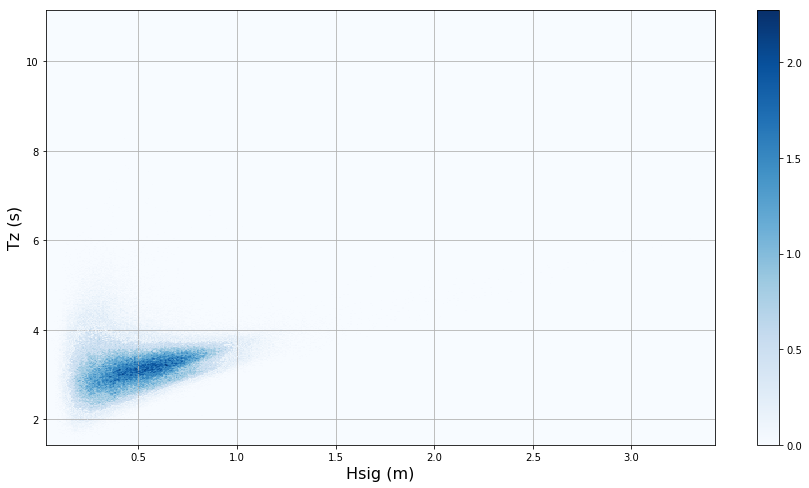

In [26]:
x_val = recs.Hsig
y_val = recs.Tz
plt.figure(figsize=(15,8))
my_cmap = plt.cm.Blues
my_cmap.set_under('w',0)
counts,xbins,ybins,image = plt.hist2d(x_val,y_val,bins=500,normed=True, cmap = my_cmap)
plt.colorbar()

plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],linewidths=0.5,cmap=my_cmap)
plt.xlabel('Hsig (m)',fontsize=16)
plt.ylabel('Tz (s)',fontsize=16)

plt.scatter(x_val,s)
plt.grid(True)
plt.axis('On')
plt.show()

In [23]:
ybins

array([ 1.42999995,  1.44943995,  1.46887995,  1.48831995,  1.50775994,
        1.52719994,  1.54663994,  1.56607994,  1.58551994,  1.60495994,
        1.62439994,  1.64383994,  1.66327994,  1.68271994,  1.70215994,
        1.72159994,  1.74103994,  1.76047994,  1.77991994,  1.79935994,
        1.81879993,  1.83823993,  1.85767993,  1.87711993,  1.89655993,
        1.91599993,  1.93543993,  1.95487993,  1.97431993,  1.99375993,
        2.01319993,  2.03263993,  2.05207993,  2.07151993,  2.09095993,
        2.11039992,  2.12983992,  2.14927992,  2.16871992,  2.18815992,
        2.20759992,  2.22703992,  2.24647992,  2.26591992,  2.28535992,
        2.30479992,  2.32423992,  2.34367992,  2.36311992,  2.38255992,
        2.40199991,  2.42143991,  2.44087991,  2.46031991,  2.47975991,
        2.49919991,  2.51863991,  2.53807991,  2.55751991,  2.57695991,
        2.59639991,  2.61583991,  2.63527991,  2.65471991,  2.67415991,
        2.6935999 ,  2.7130399 ,  2.7324799 ,  2.7519199 ,  2.77